## **EMA Trend Reversal**
**Rationale**
- If EMA trend changes from downtrending to uptrending, it signals a trend reversal into a bullish trend.
- Likewise, if EMA trend changes from uptrending to downtrending, it signals a trend reversal into a bearish trend.
- Identify Trend Reversals using EMA for buy-in opportunities

**Aim**
- We will explore if EMA Trend Reversal is a viable trading strategy.
- We will also explore an optimization technique to increase the profitability of this trading strategy:
    - Find Optimal Exit Timing

**Limitations**
1. Operates at 1 hour intervals due to Yahoo Finance limitations.
- If it is a viable strategy, use API to convert to shorter time frames, such as 5 or 15 min intervals.

## **EMA Indicator**
**Understanding the EMA Indicator**

The EMA (Exponential Moving Average) indicator is another type of trend-following momentum indicator and it is mainly used to identify changes in direction and momentum of a trend.

**Formula**

It is calculated by the following equation:
$$
\text{EMA}(today) = (Close(today) * Multiplier)+(EMA(yesterday)×(1−Multiplier))
$$

The multiplier is calculated with the following equation:

$$
\text{Multiplier} = 2 / (n + 1) 
$$

Where n is the number of desired periods of EMA. (e.g. 10, 20, 50, 100, 200)

**Steps on how to use EMA Indicator to perform trades**

1. Obtain the Exponential Moving Average with the desired period
2. Monitor the EMA trend reversal for potential entries
3. Set appropriate take-profit and stop-losses for each entry

NOTE: This is a very simple strategy designed solely for research purposes and is not intended to be profitable.


**Gather Historical Data for the stock of interest**
- For this notebook, we will re-analyse the stock: NVIDIA (Ticker Symbol: NVDA)

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta

from datetime import datetime

In [8]:
def get_historical_data(ticker):
    data = pd.DataFrame()
    stock_data = yf.download(
        ticker,
        start=datetime(2024, 1, 1),
        end=datetime(2024, 10, 1),
        interval='1h',
        prepost=True
    )

    data_ticker = stock_data[['Open', 'High', 'Low', 'Close']]

    data_ticker.columns = [f"{col}" for col in data_ticker.columns]

    data = pd.concat([data, data_ticker], axis=1)
    return data


In [9]:
df = get_historical_data('NVDA')
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Datetime,,,,
2024-09-30 10:30:00-04:00,120.099998,120.973801,119.660004,120.973801
2024-09-30 11:30:00-04:00,121.065002,121.099998,120.260002,120.714996
2024-09-30 12:30:00-04:00,120.720001,120.809998,119.959999,120.100700
2024-09-30 13:30:00-04:00,120.105003,120.690002,119.180000,119.470001
2024-09-30 14:30:00-04:00,119.470001,120.360001,119.190002,120.084999
2024-09-30 15:30:00-04:00,120.080002,121.500000,119.819702,121.489998
2024-09-30 16:00:00-04:00,121.500000,126.470000,119.410000,121.200000
2024-09-30 17:00:00-04:00,121.200000,127.999600,120.700000,121.060000
2024-09-30 18:00:00-04:00,121.060000,121.140000,120.950000,121.080000


In [10]:
ema_period = 50

#Calculate EMA50
df[f'EMA{ema_period}'] = round(df['Close'].ewm(span=ema_period, adjust=False).mean(),2)

df.tail(10)

,Open,High,Low,Close,EMA50
Datetime,,,,,
2024-09-30 10:30:00-04:00,120.099998,120.973801,119.660004,120.973801,121.16
2024-09-30 11:30:00-04:00,121.065002,121.099998,120.260002,120.714996,121.14
2024-09-30 12:30:00-04:00,120.720001,120.809998,119.959999,120.100700,121.10
2024-09-30 13:30:00-04:00,120.105003,120.690002,119.180000,119.470001,121.04
2024-09-30 14:30:00-04:00,119.470001,120.360001,119.190002,120.084999,121.00
2024-09-30 15:30:00-04:00,120.080002,121.500000,119.819702,121.489998,121.02
2024-09-30 16:00:00-04:00,121.500000,126.470000,119.410000,121.200000,121.03
2024-09-30 17:00:00-04:00,121.200000,127.999600,120.700000,121.060000,121.03
2024-09-30 18:00:00-04:00,121.060000,121.140000,120.950000,121.080000,121.03


**Visualize Stock Price and EMA Indicator**

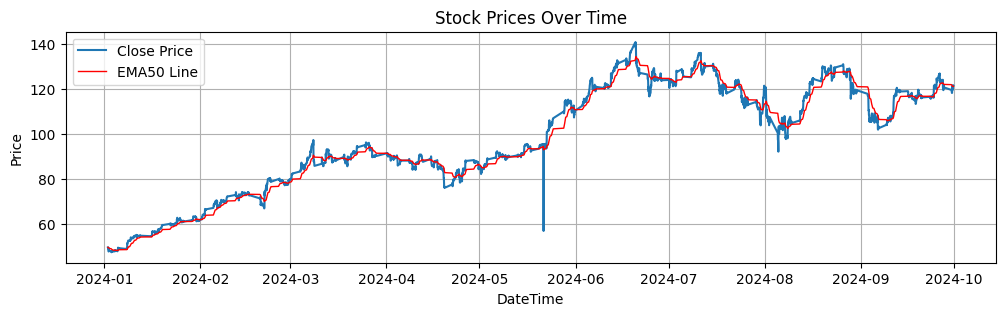

In [12]:
plt.figure(figsize=(12, 3))

# Plot Close prices
plt.plot(df.index, df['Close'], label='Close Price', alpha=1)
plt.plot(df.index, df['EMA50'], label='EMA50 Line', color='red', linewidth=1)

plt.title('Stock Prices Over Time')
plt.xlabel('DateTime')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


**Implement Strategy**

Now that we have managed to obtain the EMA values for the stock price data, we can proceed to implement a strategy to test the profitability of this indicator.

The strategy will be as such:
- Entry Point when EMA trend reversal occurs.
- As with the other notebooks, we will set the average stop loss to be -2% and take-profit to be +6%. Thus, yielding a 1:3 RR Ratio.
- Run back-test to test this strategy.

In [34]:
def calculate_ema_reversal(df):
  prev_signal, curr_signal, total_count = 0, 0, 0
  bullish_reversals = []

  df_ema = df[f'EMA{ema_period}'].values
  df_datetime = df.index.values

  for i in range(len(df)):
    if df_ema[i] > df_ema[i-1]:
      curr_signal = 1
    elif df_ema[i] < df_ema[i-1]:
      curr_signal = -1
    else:
      curr_signal = prev_signal

    if curr_signal > prev_signal:
      total_count += 1
      bullish_reversals.append([i, df_datetime[i], df_ema[i-1], df_ema[i]])
    prev_signal = curr_signal

  return bullish_reversals

In [72]:
def calculate_price_hit(net_revenue, wins, losses, curr_holdings, high, low):
  temp_holdings = []
  if len(curr_holdings) > 0:
      for holdings in curr_holdings:
        if high > holdings[2]:
          profit = round(holdings[2] - holdings[1],2)
          net_revenue += profit
          wins += 1

        # Do not sell if candle that was bought on have lower Low Price as it could have been due to sharp increase which cause MACD to pivot
        elif low < holdings[0] and holdings[3] == 0:
          loss = round(holdings[0] - holdings[1],2)
          net_revenue += loss
          losses+= 1

        # If at this iteration, no sell has occurred -> put back to holdings
        else:
          holdings[3] = 0
          temp_holdings.append(holdings)

      curr_holdings = temp_holdings

  return net_revenue, wins, losses, curr_holdings

def calculate_ema_strategy(df):

  df_datetime = df.index.values
  df_close_prices = df['Close'].values
  df_high_prices = df['High'].values
  df_low_prices = df['Low'].values

  reversals = calculate_ema_reversal(df)
  curr_holdings = []
  wins, losses = 0, 0
  net_revenue = 0

  counter = 0

  for i in range(len(df)):
    if counter < len(reversals):
      if i == reversals[counter][0]: # IF CLAUSE TO CHECK IF ALL CONDITIONS ARE MET
        counter += 1
        curr_price = round(df_close_prices[i], 2)
        stop_loss_price = round(curr_price * 0.98, 2)
        profit_price = round(curr_price*1.06, 2)
        curr_holdings.append([stop_loss_price, curr_price, profit_price, 1])

    net_revenue, wins, losses, curr_holdings = calculate_price_hit(net_revenue, wins, losses, curr_holdings, df_high_prices[i], df_low_prices[i])
  return [net_revenue, wins, losses, len(curr_holdings)]

In [73]:
result = calculate_ema_strategy(df)

print(f" Net Revenue: ${round(result[0],2)}, Wins: {result[1]}, Losses: {result[2]}, Open Positions: {result[3]}")

 Net Revenue: $14.86, Wins: 21, Losses: 52, Open Positions: 1


**Remarks**
- The net revenue and W/L rate from this strategy does not seem to be good. Thus, let's implement some optimization techniques to further increase the profitability of this trading strategy.

**Optimization Tecnique 1: Finding Optimal Exit Timing**
- In this section, we will determine the average rise/drop over a period of time after every reversal.
- This will allow us to understand what our expected take-profit and stop-loss should be, and thus, helping us to exit trades with better results.

In [51]:
bullish_reversals = calculate_ema_reversal(df)

In [52]:
df_datetime = df.index.values
df_ema = df[f'EMA{ema_period}'].values
df_open_prices = df['Open'].values
df_close_prices = df['Close'].values
df_high_prices = df['High'].values
df_low_prices = df['Low'].values

candlesMap = {}

for reversal in bullish_reversals:
  buy_in_price = df_close_prices[reversal[0]]
  for j in range(1, 50):
    if len(df_close_prices) <= reversal[0] + j:
      break
    else:
      if j not in candlesMap:
        candlesMap[j] = [100*(df_close_prices[reversal[0] + j] - buy_in_price)/buy_in_price]
      else:
        candlesMap[j].append(100*(df_close_prices[reversal[0] + j] - buy_in_price)/buy_in_price)



In [53]:
import matplotlib.pyplot as plt
import numpy as np

risk_reward = []

positive_overall = []
negative_overall = []

positive_counts = []
negative_counts = []

positive_averages = []
negative_averages = []
expected_averages = []

# Loop through each key in the hashMap
for key in candlesMap:
    values = candlesMap[key]


    positives = [x for x in values if x >= 0]
    negatives = [x for x in values if x < 0]

    sum_positive = sum(positives) if positives else 0
    sum_negative = abs(sum(negatives)) if negatives else 0

    positive_overall.append(sum_positive)
    negative_overall.append(sum_negative)

    positive_counts.append(len(positives))
    negative_counts.append(len(negatives))

    positive_avg = np.mean(positives) if positives else 0
    negative_avg = abs(np.mean(negatives)) if negatives else 0
    expected_avg = (len(positives)/len(values) * positive_avg) + (len(negatives)/len(values) * -negative_avg)

    positive_averages.append(positive_avg)
    negative_averages.append(negative_avg)
    expected_averages.append(expected_avg)

    risk_reward.append((len(positives)/len(values) * positive_avg)/(len(negatives)/len(values) * negative_avg))

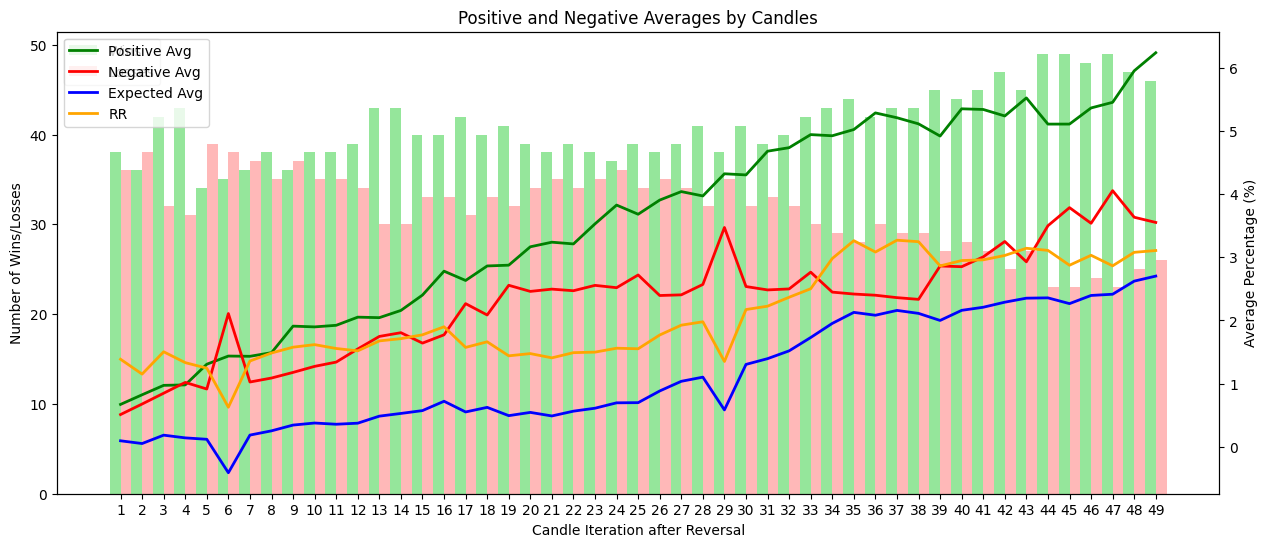

In [54]:
fig, ax1 = plt.subplots(figsize=(15, 6))

x_labels = list(candlesMap.keys())
bar_width = 0.5
x_pos = np.arange(len(x_labels))


ax1.bar(x_pos - bar_width/2, positive_counts, bar_width, label='Wins', color='#95e69b')
ax1.bar(x_pos + bar_width/2, negative_counts, bar_width, label='Losses', color='#ffb8b8')

ax2 = ax1.twinx()
ax2.plot(x_pos, positive_averages, label='Positive Avg', color='green', linewidth=2)
ax2.plot(x_pos, negative_averages, label='Negative Avg', color='red', linewidth=2)
ax2.plot(x_pos, expected_averages, label='Expected Avg', color='blue', linewidth=2)
ax2.plot(x_pos, risk_reward, label='RR', color='orange', linewidth=2)
ax2.set_ylabel('Average Percentage (%)')

# Add labels, title, and legend
ax1.set_xlabel('Candle Iteration after Reversal')
ax1.set_ylabel('Number of Wins/Losses')
ax1.set_title('Positive and Negative Averages by Candles')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x_labels)
ax1.legend()
ax2.legend()

# Show the plot
plt.show()

**Remarks**
- The positive average and negative average tends to have an upward trend after a reversal has occured.
- Similarly, the Risk-Reward Ratio also has an upward trend and starts to stabilize at around 1:3.

**Calculate Best Time to Exit**

In [55]:
potential_revenue = 0
curr_revenue = 0
flag = 0

for t in range(len(expected_averages)):
  curr_revenue = expected_averages[t]

  for t1 in range(t):
    for t2 in range(t-t1):
      potential_revenue = expected_averages[t1] + expected_averages[t2]

      if potential_revenue > curr_revenue:
        flag = 1
        break

    if flag == 1:
      break

print(f"Optimal Time to Exit: Period {t}")

Optimal Time to Exit: Period 48


**Implement Modified Strategy**

With the calculated optimal exit timing, we can now implement a modified strategy which strictly exits every trade at the 48th period. Let's calculate and compare the results.

In [70]:
def calculate_modified_ema_strategy(df, optimal_exit):
  
  df_close_prices = df['Close'].values

  reversals = calculate_ema_reversal(df)
  net_revenue, wins, losses = 0, 0, 0
  counter = 0

  for i in range(len(df) - optimal_exit):
    if counter < len(reversals):
      if i == reversals[counter][0]: # IF CLAUSE TO CHECK IF ALL CONDITIONS ARE MET
        counter += 1
        curr_price = round(df_close_prices[i], 2)
        profit = df_close_prices[i+optimal_exit] - curr_price
        net_revenue += profit

        if profit >= 0:
          wins += 1
        else:
          losses += 1


  return [net_revenue, wins, losses]

In [71]:
result = calculate_modified_ema_strategy(df, 48)
print(f" Net Revenue: ${round(result[0],2)}, Wins: {result[1]}, Losses: {result[2]}")

 Net Revenue: $162.99, Wins: 47, Losses: 25


**Remarks**
- Both the Net Revenue and W/L rate for this trading strategy has improved significantly as a result from the optimizations made to this trading strategy.
- However, do note that this optimization technique falls prey to the look-ahead bias and is extremely prone to overfitting. Thus, it is extremely important to address these issues with techniques such as moving windows.

## **Future Works**
- Further Optimization of this trading strategy
    - 
- Combining this strategy with other trading strategies
    - For example, combining it with other technical indicators or quantitative strategies can yield even more profitable results.